<a id='title'/>



## Data Preparation<a id='part2'/>
---

### B1. Exploratory Data Analysis<a id='b1'/>
---

In [ ]:
# Import data
df = pd.read_csv('Reviews.csv', engine='python', on_bad_lines='warn', quoting=3)

In [ ]:
# Review data shape
df.info()
df = df.rename(columns={'Text': 'text'})
df = df.rename(columns={'Score': 'rating'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4420 entries, 0 to 4419
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      4420 non-null   int64  
 1   ProductId               4420 non-null   object 
 2   UserId                  4419 non-null   object 
 3   ProfileName             4418 non-null   object 
 4   HelpfulnessNumerator    4419 non-null   float64
 5   HelpfulnessDenominator  4419 non-null   float64
 6   Score                   4419 non-null   float64
 7   Time                    4419 non-null   float64
 8   Summary                 4419 non-null   object 
 9   Text                    4419 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 345.4+ KB


In [ ]:
# Keep relevant columns
df = df[['text', 'rating']]

In [ ]:
# Remove observations with no text
df = df.dropna(subset='text')

In [ ]:
# Review data shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4419 entries, 0 to 4418
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    4419 non-null   object 
 1   rating  4419 non-null   float64
dtypes: float64(1), object(1)
memory usage: 103.6+ KB


In [ ]:
# Remove numbers from text
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

df['text'] = df['text'].apply(remove_numbers)

In [ ]:
# Define function to identify unusual characters
def has_unusual_chars(text):
    # usual characters to ignore
    if re.search(r'[^\w\s,.;:!?\-]', text):
        return True
    else:
        return False

In [ ]:
# Create new column to identify observations with unusual characters
df['unusual_chars'] = df['text'].apply(has_unusual_chars)

In [ ]:
# View identified characters
df[df['unusual_chars'] == True]

,text,rating,unusual_chars
1,"""Product arrived labeled as Jumbo Salted Peanu...",1.0,True
2,If you are looking for the secret ingredient i...,2.0,True
3,Right now I'm mostly just sprouting this so my...,5.0,True
10,I can remember buying this candy as a kid and ...,5.0,True
12,I was so glad Amazon carried these batteries. ...,4.0,True
...,...,...,...
4401,We came across this tea at PF Chang's China Bi...,5.0,True
4402,If you enjoy a cup (or two) of awesome tea...l...,5.0,True
4403,We enjoy hot tea and we find Revolution tea to...,5.0,True
4405,"""Just regular breakfast coffee...a great way t...",5.0,True


In [ ]:
# Quantify observations found
print(f'Percent of Observation with Unusual Characters: {round(df.unusual_chars.mean() * 100, 2)}%')

Percent of Observation with Unusual Characters: 52.98%


In [ ]:
# Initialize a Tokenizer object
tokenizer = Tokenizer(num_words=10000)

In [ ]:
# Fit the tokenizer on the text data
tokenizer.fit_on_texts(df['text'])

In [ ]:
# Convert texts into sequences of integers and tokens
df['sequence'] = tokenizer.texts_to_sequences(df['text'])
df['seq_text'] = tokenizer.sequences_to_texts(df['sequence'])

In [ ]:
# Count the word index
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

Found 8711 unique tokens.


In [ ]:
# Calculate sequence lengths
df['seq_length'] = df['sequence'].apply(len)
df.drop('sequence', axis=1, inplace=True)

In [ ]:
# Print summary statistics
print(df['seq_length'].describe())

count    4419.000000
mean       41.309572
std        26.503416
min         6.000000
25%        24.000000
50%        34.000000
75%        49.000000
max       463.000000
Name: seq_length, dtype: float64


In [ ]:
# Identify the 95th percentile of sequence lengths
max_seq = int(df.seq_length.quantile(0.95))
print(f'Chosen Maximum Sequence Length: {max_seq} tokens')

Chosen Maximum Sequence Length: 90 tokens


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Tokenize text sequence
df['tokens'] = df['seq_text'].apply(word_tokenize)

In [ ]:
# Initialize a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

In [ ]:
# Define a function to lemmatize tokens
def lemmatize_words(words):
    return [lemmatizer.lemmatize(word) for word in words]

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Convert words into their root forms
df['lemmatized'] = df['tokens'].apply(lemmatize_words)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

# Define function to remove stop words
def remove_stopwords(words):
    return [word for word in words if word not in stop_words]

In [ ]:
# Remove stop words from tokenized text
df['filtered'] = df['lemmatized'].apply(remove_stopwords)

In [ ]:
# Fit the tokenizer on the text data
tokenizer.fit_on_texts(df['filtered'])

In [ ]:
# Count the word index
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

Found 9081 unique tokens.


In [ ]:
# Sequence the filtered text
df['seq'] = tokenizer.texts_to_sequences(df['filtered'])

In [ ]:
# Pad sequences
padded_sequences = pad_sequences(df['seq'].values, maxlen=max_seq)

In [ ]:
# Single sequence
df.loc[0]['filtered']

['bought',
 'several',
 'vitality',
 'canned',
 'dog',
 'food',
 'product',
 'found',
 'good',
 'quality',
 'product',
 'look',
 'like',
 'stew',
 'processed',
 'meat',
 'smell',
 'better',
 'labrador',
 'finicky',
 'appreciates',
 'product',
 'better']

In [ ]:
# Single padded sequence
padded_sequences[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,   70,  238, 4873,  788,   58,   53,   18,   84,   14,  128,
         18,  298,   17, 2411, 1629,  552,  279,   65, 4874, 2412, 4875,
         18,   65], dtype=int32)

In [ ]:
# Label and encode ratings
rating_dict = {
    1: 'Negative',
    2: 'Negative',
    3: 'Neutral',
    4: 'Positive',
    5: 'Positive'
}

df['class_rating'] = df['rating'].map(rating_dict)

In [ ]:
# One-hot encode classes
df_encoded = pd.get_dummies(df['class_rating'])

In [ ]:
df_encoded.head()

,Negative,Neutral,Positive
0,False,False,True
1,True,False,False
2,True,False,False
3,False,False,True
4,False,False,True


In [ ]:
# Define the X and y values
X = padded_sequences
y = df_encoded.values

In [ ]:
# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

### B6. Prepared Dataset<a id='b6'/>
---

In [ ]:
# Concatenate X and y into one DataFrame
df_sequences = pd.DataFrame(X)
df_clean = pd.concat([df_sequences, df_encoded.reset_index(drop=True)], axis=1)

df_clean

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,Negative,Neutral,Positive
0,0,0,0,0,0,0,0,0,0,0,...,279,65,4874,2412,4875,18,65,False,False,True
1,0,0,0,0,0,0,0,0,0,0,...,23,2142,1028,2143,4876,18,2833,True,False,False
2,0,0,0,0,0,0,0,0,0,0,...,23,14,91,789,442,22,2836,True,False,False
3,0,0,0,0,0,0,0,0,0,0,...,80,766,19,3532,275,4878,2414,False,False,True
4,0,0,0,0,0,0,0,0,0,0,...,845,58,989,1946,325,108,956,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4414,0,0,0,0,0,0,0,0,0,0,...,461,141,66,1001,78,43,48,False,False,True
4415,0,0,0,0,0,0,0,0,0,0,...,40,42,165,14,125,43,354,False,False,True
4416,0,0,0,0,0,0,0,0,0,0,...,148,187,326,139,187,16,389,False,False,True
4417,0,0,0,0,0,0,0,0,0,0,...,110,78,352,250,84,1443,163,False,False,True


In [ ]:
# Store the cleaned dataset
df_clean.to_json('clean_reviews.json')



##  Network Architecture<a id='part3'/>
---

In [ ]:
# Initialize a Sequential model object
model = Sequential([
    Embedding(input_dim=len(word_index), output_dim=200, input_length=max_seq),
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(128),
    Dense(64, activation='relu',
          kernel_regularizer=regularizers.l2(0.01),
          activity_regularizer=regularizers.l1(0.01)),
    Dense(3, activation='softmax')  # number of classes (sentiment categories)
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define validation set and convert to Tensor
stop = int(len(X_test)/2)

X_train = convert_to_tensor(X_train)
X_val = convert_to_tensor(X_test[:stop])
X_test = convert_to_tensor(X_test[stop:])

y_train = convert_to_tensor(y_train)
y_val = convert_to_tensor(y_test[:stop])
y_test = convert_to_tensor(y_test[stop:])



##  Model Evaluation<a id='part4'/>
---

In [ ]:
# Create early stopping object
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')

In [ ]:
import tensorflow as tf
print("GPUs available: ", tf.config.list_physical_devices('GPU'))

GPUs available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


Physical devices cannot be modified after being initialized


In [ ]:
# Train the model on GPU
with tf.device('/GPU:0'):
    history = model.fit(
        X_train, y_train,
        epochs=100,  # Set the number of epochs
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping]
    )


Epoch 1/100
3268/3268 ━━━━━━━━━━━━━━━━━━━━ 69s 20ms/step - accuracy: 0.8188 - loss: 0.8350 - val_accuracy: 0.8203 - val_loss: 0.5761
Epoch 2/100
3268/3268 ━━━━━━━━━━━━━━━━━━━━ 77s 19ms/step - accuracy: 0.8235 - loss: 0.5704 - val_accuracy: 0.8203 - val_loss: 0.5750
Epoch 3/100
3268/3268 ━━━━━━━━━━━━━━━━━━━━ 84s 19ms/step - accuracy: 0.8227 - loss: 0.5713 - val_accuracy: 0.8203 - val_loss: 0.5749
Epoch 4/100
3268/3268 ━━━━━━━━━━━━━━━━━━━━ 83s 19ms/step - accuracy: 0.8227 - loss: 0.5721 - val_accuracy: 0.8203 - val_loss: 0.5750
Epoch 5/100
3268/3268 ━━━━━━━━━━━━━━━━━━━━ 81s 19ms/step - accuracy: 0.8212 - loss: 0.5750 - val_accuracy: 0.8203 - val_loss: 0.5749
Epoch 6/100
3268/3268 ━━━━━━━━━━━━━━━━━━━━ 83s 19ms/step - accuracy: 0.8232 - loss: 0.5708 - val_accuracy: 0.8203 - val_loss: 0.5750
Epoch 7/100
3268/3268 ━━━━━━━━━━━━━━━━━━━━ 80s 19ms/step - accuracy: 0.8213 - loss: 0.5755 - val_accuracy: 0.8203 - val_loss: 0.5749
Epoch 8/100
3268/3268 ━━━━━━━━━━━━━━━━━━━━ 85s 20ms/step - accuracy: 

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score # Importing necessary functions


# Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=1)

# Calculate precision, recall, F1 score
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)

print('Precision:', precision_score(y_test_argmax, y_pred, average='weighted'))
print('Recall:', recall_score(y_test_argmax, y_pred, average='weighted'))
print('F1 score:', f1_score(y_test_argmax, y_pred, average='weighted'))

701/701 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8207 - loss: 0.5768


701/701 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Precision: 0.6760363368742606
Recall: 0.8222142889017805
F1 score: 0.7419943318320666


In [ ]:
# Evaluate the model on the test data
print('Evaluate on test data')
test_results = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss, Test accuracy:', test_results)

Evaluate on test data
701/701 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8207 - loss: 0.5768
Test loss, Test accuracy: [0.5713743567466736, 0.8222143054008484]


In [ ]:
# Log the training results
results = pd.DataFrame(history.history)
results

,accuracy,loss,val_accuracy,val_loss
0,0.821518,0.665791,0.820332,0.576090
1,0.821815,0.574048,0.820332,0.574988
2,0.821815,0.573947,0.820332,0.574922
3,0.821815,0.573958,0.820332,0.574970
4,0.821815,0.573963,0.820332,0.574917
5,0.821815,0.573944,0.820332,0.574964
6,0.821815,0.573951,0.820332,0.574922
7,0.821815,0.573961,0.820332,0.574921


# **Pre trained lstm model**

In [ ]:
from keras.layers import LSTM

In [ ]:
# Assuming you have a dictionary called 'word_index' containing the vocabulary:
vocab_length = len(word_index) + 1
vocab_length

43166

In [ ]:
word_tokenizer = Tokenizer()

In [ ]:
 # Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()
# Create Embedding Matrix having 100 columns
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
# Neural Network architecture
maxlen = 100
lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable= True)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

# Change activation function and number of output nodes
lstm_model.add(Dense(3, activation='softmax')) # 3 output nodes for 3 classes, softmax for multi-class

# Model compiling
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc']) # Use categorical_crossentropy for multi-class
print(lstm_model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │       4,316,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,316,600 (16.47 MB)

 Trainable params: 4,316,600 (16.47 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:

# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
654/654 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - acc: 0.8562 - loss: 0.4268 - val_acc: 0.9024 - val_loss: 0.2826
Epoch 2/6
654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - acc: 0.9149 - loss: 0.2447 - val_acc: 0.9063 - val_loss: 0.2794
Epoch 3/6
654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - acc: 0.9319 - loss: 0.1991 - val_acc: 0.9140 - val_loss: 0.2621
Epoch 4/6
654/654 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - acc: 0.9440 - loss: 0.1645 - val_acc: 0.9151 - val_loss: 0.2749
Epoch 5/6
654/654 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - acc: 0.9568 - loss: 0.1304 - val_acc: 0.9122 - val_loss: 0.2853
Epoch 6/6
654/654 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - acc: 0.9641 - loss: 0.1097 - val_acc: 0.9153 - val_loss: 0.3174


In [ ]:
# Predictions on the Test Set

score = lstm_model.evaluate(X_test, y_test, verbose=1)

701/701 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9122 - loss: 0.3361


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3303976356983185
Test Accuracy: 0.9132937788963318


In [ ]:
# Predict sentiment of a specific sentence
sentence = "it was horrible"
processed_sentence = tokenizer.texts_to_sequences([sentence])

# Define max_length or retrieve it if it was saved during training
# For instance, if you saved max_length as 100 during training, set it here:
max_length = 100  # Replace with the actual value used during training

padded_sentence = tf.keras.preprocessing.sequence.pad_sequences(processed_sentence, maxlen=max_length)

prediction = lstm_model.predict(padded_sentence)

# Assuming 3 output nodes: negative, neutral, positive
# Access the probability for positive sentiment (index 2)
positive_prob = prediction[0][2]  # prediction[0] gets the first (and only) sample's predictions
print(positive_prob)

print(f"Predicted Sentiment for '{sentence}': {'Positive' if positive_prob > 0.5 else 'Negative'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
0.007874218
Predicted Sentiment for 'it was horrible': Negative


In [ ]:
# Predict sentiment of a specific sentence
sentence = "wow this was nice but can be better "
processed_sentence = tokenizer.texts_to_sequences([sentence])

# Define max_length or retrieve it if it was saved during training
# For instance, if you saved max_length as 100 during training, set it here:
max_length = 100  # Replace with the actual value used during training

padded_sentence = tf.keras.preprocessing.sequence.pad_sequences(processed_sentence, maxlen=max_length)

prediction = lstm_model.predict(padded_sentence)

# Assuming 3 output nodes: negative, neutral, positive
# Access the probability for positive sentiment (index 2)
positive_prob = prediction[0][2]  # prediction[0] gets the first (and only) sample's predictions
print(positive_prob)

print(f"Predicted Sentiment for '{sentence}': {'Positive' if positive_prob > 0.5 else 'Negative'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0.94587755
Predicted Sentiment for 'wow this was nice but can be better ': Positive


In [ ]:
# Evaluate the model on the test data
print('Evaluate on test data')
test_results = lstm_model.evaluate(X_test, y_test, batch_size=32)
print('Test loss, Test accuracy:', test_results)

Evaluate on test data
701/701 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.9122 - loss: 0.3361
Test loss, Test accuracy: [0.3303976356983185, 0.9132937788963318]


In [ ]:
# Save the trained network
lstm_model.save('lstm_model(2).h5')  # create an HDF5 file 'lstm_model.h5'

# Load and check model

In [ ]:
new_model = load_model('lstm_model(2).h5')

In [ ]:
new_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 90, 100)             │       4,316,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 128)                 │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,434,237 (16.92 MB)

 Trainable params: 4,434,235 (16.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score # Importing necessary functions


# Evaluate model on test data
score = new_model.evaluate(X_test, y_test, verbose=1)

# Calculate precision, recall, F1 score
y_pred = new_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)

print('Precision:', precision_score(y_test_argmax, y_pred, average='weighted'))
print('Recall:', recall_score(y_test_argmax, y_pred, average='weighted'))
print('F1 score:', f1_score(y_test_argmax, y_pred, average='weighted'))

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - acc: 0.6937 - loss: 1.3552
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step
Precision: 0.6813840407397413
Recall: 0.6998491704374057
F1 score: 0.6897521507415211


In [ ]:
import json

In [ ]:

from tensorflow.keras.preprocessing.text import tokenizer_from_json # Import the missing function

tokenizer = Tokenizer(num_words=10000)
with open('tokenizer.json', 'r') as f:
    tokenizer_json = json.load(f)
    tokenizer = tokenizer_from_json(tokenizer_json) # Now the function is available

In [ ]:
import tensorflow as tf
import numpy as np

# Assuming tokenizer and new_model are already loaded and available

sentences = [
    "nice product",
    "can be better",
    "The product has revolutionized how we approach our daily operations. The attention to detail and user-friendly design are unparalleled. A must-have for anyone looking to optimize efficiency.",
    "While the core functionality is excellent, I was most impressed by the customer service. They went above and beyond to resolve an issue I faced. Great experience!",
    "The integration capabilities of this product are superb. It seamlessly connects with our existing tools, saving us hours each week. Well done",
    "The analytics features provided insights we never knew we needed. This has helped our decision-making process immensely. Worth every penny.",
    "\"An excellent product with a focus on sustainability. Knowing that our purchase supports eco-friendly practices is a big plus for our company.\"",
    "The product did not live up to the hype. Several features are either broken or not user-friendly. Disappointing experience overall.",
    "Extremely slow and laggy. We spent more time troubleshooting than actually using the product. Not worth the investment.",
    "The lack of proper documentation made setup a nightmare. Had to hire an external consultant just to get it running. Wouldn’t recommend",
    "The product promises a lot but delivers very little. Customer support was unresponsive when we tried to get help.",
    "We encountered constant bugs that made the product unusable. A complete waste of time and resources",
    "The product does what it claims, but nothing more. It’s functional but lacks any standout features.",
    "Decent product for the price, but there are better alternatives in the market. It’s a middle-of-the-road option.",
    "The product is okay, but I wouldn’t recommend it for larger teams. It seems better suited for smaller setups",
    "It worked as advertised, but the design feels outdated. It’s functional but not visually appealing",
    "No major complaints, but nothing to rave about either. It gets the job done.",
    "This product has been a game-changer for our team! The seamless workflow and robust features have significantly improved our efficiency. Highly recommended.",
    "Unfortunately, this product didn’t meet our expectations. The frequent crashes and lack of updates made it difficult to rely on for critical tasks.",
    "It’s an average product. While it does what it promises, it lacks innovation or features that would make it stand out in a competitive market.\n\n",
    "GOOD",
    "Amazing product"
]

# Process each sentence using the tokenizer
processed_sentences = tokenizer.texts_to_sequences(sentences)

# Define max_length (ensure this is the same as used during model training)
max_length = 100

# Pad the sequences to the required length
padded_sentences = tf.keras.preprocessing.sequence.pad_sequences(processed_sentences, maxlen=max_length)

# Make predictions on the padded sentences
predictions = new_model.predict(padded_sentences)

# Process each sentence's prediction and display the results
for i, sentence in enumerate(sentences):
    # Assuming 3 output nodes: negative, neutral, positive
    positive_prob = predictions[i][2]  # Index 2 for positive sentiment
    sentiment = "Positive" if positive_prob > 0.5 else "Negative"

    print(f"Sentence: {sentence}")
    print(f"Predicted Sentiment: {sentiment} (Positive Probability: {positive_prob:.2f})")
    print("-" * 50)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
Sentence: nice product
Predicted Sentiment: Positive (Positive Probability: 0.96)
--------------------------------------------------
Sentence: can be better
Predicted Sentiment: Negative (Positive Probability: 0.29)
--------------------------------------------------
Sentence: The product has revolutionized how we approach our daily operations. The attention to detail and user-friendly design are unparalleled. A must-have for anyone looking to optimize efficiency.
Predicted Sentiment: Negative (Positive Probability: 0.00)
--------------------------------------------------
Sentence: While the core functionality is excellent, I was most impressed by the customer service. They went above and beyond to resolve an issue I faced. Great experience!
Predicted Sentiment: Negative (Positive Probability: 0.07)
--------------------------------------------------
Sentence: The integration capabilities of this product are superb. It seamlessly connects with our e


# **Other**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Compute TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
tfidf_matrix = vectorizer.fit_transform(sentences)
feature_names = vectorizer.get_feature_names_out()

# Display top words for each testimonial
for idx, doc in enumerate(tfidf_matrix):
    print(f"Document {idx+1} Top Words:")
    for word_idx in doc.nonzero()[1]:
        print(f"  {feature_names[word_idx]}: {doc[0, word_idx]:.2f}")


Document 1 Top Words:
  product: 1.00
Document 2 Top Words:
  better: 1.00
Document 3 Top Words:
  product: 0.32
  friendly: 0.64
  design: 0.70
Document 4 Top Words:
  experience: 1.00
Document 5 Top Words:
  product: 1.00
Document 6 Top Words:
  features: 1.00
Document 7 Top Words:
  product: 0.44
  friendly: 0.90
Document 8 Top Words:
  product: 0.28
  friendly: 0.56
  experience: 0.62
  features: 0.48
Document 9 Top Words:
  product: 0.41
  time: 0.91
Document 10 Top Words:
  wouldn: 0.71
  recommend: 0.71
Document 11 Top Words:
  product: 0.41
  promises: 0.91
Document 12 Top Words:
  product: 0.41
  time: 0.91
Document 13 Top Words:
  product: 0.50
  features: 0.86
Document 14 Top Words:
  product: 0.44
  better: 0.90
Document 15 Top Words:
  product: 0.26
  better: 0.52
  wouldn: 0.58
  recommend: 0.58
Document 16 Top Words:
  design: 1.00
Document 17 Top Words:
Document 18 Top Words:
  product: 0.50
  features: 0.86
Document 19 Top Words:
  product: 1.00
Document 20 Top Words:


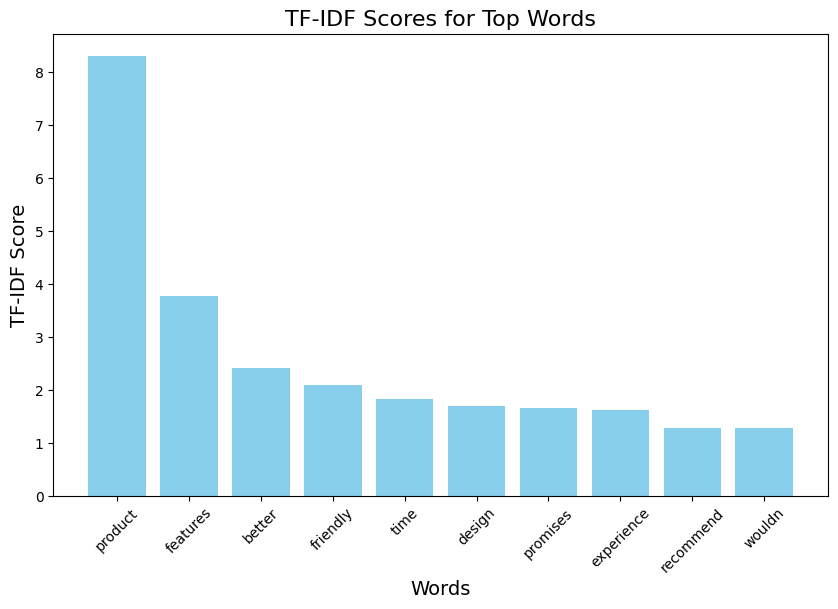

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Flatten the TF-IDF matrix to get scores for each word
scores = tfidf_matrix.toarray()

# Aggregate scores for each word across all documents
word_scores = np.sum(scores, axis=0)

# Create a dictionary of words and their scores
word_dict = {feature_names[i]: word_scores[i] for i in range(len(feature_names))}

# Sort the dictionary by scores
sorted_words = dict(sorted(word_dict.items(), key=lambda x: x[1], reverse=True))

# Extract words and their scores
words, tfidf_scores = list(sorted_words.keys()), list(sorted_words.values())

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(words, tfidf_scores, color='skyblue')
plt.title('TF-IDF Scores for Top Words', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('TF-IDF Score', fontsize=14)
plt.xticks(rotation=45)
plt.show()


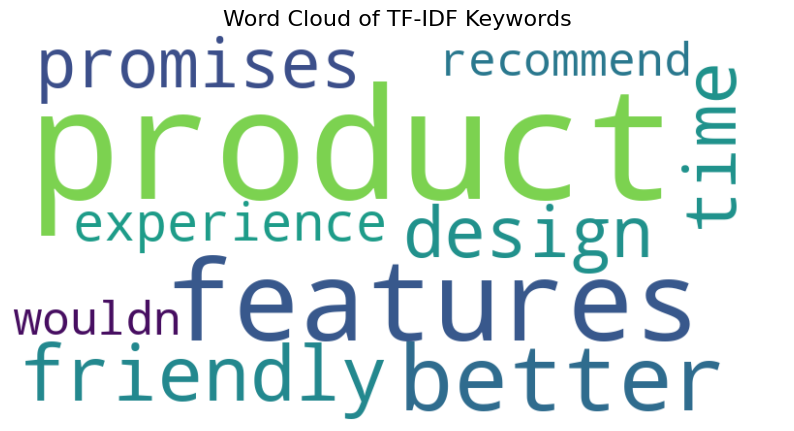

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TF-IDF Keywords', fontsize=16)
plt.show()


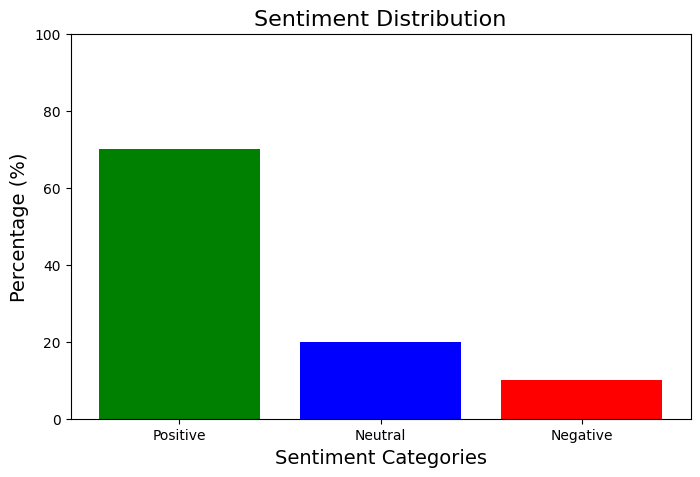

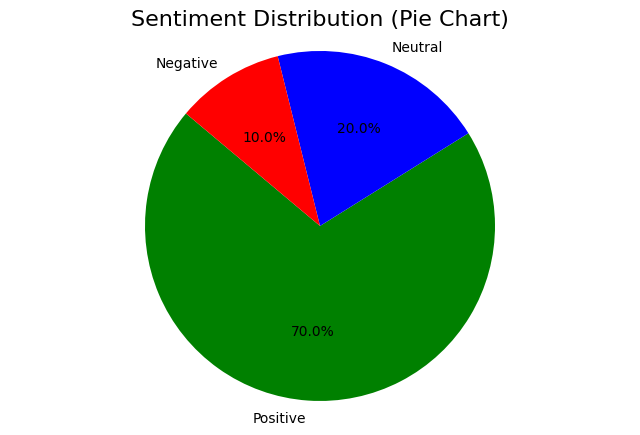

In [ ]:
import matplotlib.pyplot as plt

# Example sentiment distribution
sentiment_labels = ['Positive', 'Neutral', 'Negative']
percentages = [70, 20, 10]

# Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(sentiment_labels, percentages, color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment Categories', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.ylim(0, 100)
plt.show()

# Pie Chart
plt.figure(figsize=(8, 5))
plt.pie(percentages, labels=sentiment_labels, autopct='%1.1f%%', colors=['green', 'blue', 'red'], startangle=140)
plt.title('Sentiment Distribution (Pie Chart)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
data =[
    {
        "review": "nice product",
        "sentiment_score": 0.006689789704978466,
        "sentiment": "negative"
    },
    {
        "review": "can be better",
        "sentiment_score": 0.46363529562950134,
        "sentiment": "negative"
    },
    {
        "review": "The product has revolutionized how we approach our daily operations. The attention to detail and user-friendly design are unparalleled. A must-have for anyone looking to optimize efficiency.",
        "sentiment_score": 0.9936714172363281,
        "sentiment": "positive"
    },
    {
        "review": "While the core functionality is excellent, I was most impressed by the customer service. They went above and beyond to resolve an issue I faced. Great experience!",
        "sentiment_score": 0.9089820384979248,
        "sentiment": "positive"
    },
    {
        "review": "The integration capabilities of this product are superb. It seamlessly connects with our existing tools, saving us hours each week. Well done",
        "sentiment_score": 0.08167194575071335,
        "sentiment": "negative"
    },
    {
        "review": "The analytics features provided insights we never knew we needed. This has helped our decision-making process immensely. Worth every penny.",
        "sentiment_score": 0.0014092877972871065,
        "sentiment": "negative"
    },
    {
        "review": "\"An excellent product with a focus on sustainability. Knowing that our purchase supports eco-friendly practices is a big plus for our company.\"",
        "sentiment_score": 0.9103196263313293,
        "sentiment": "positive"
    },
    {
        "review": "The product did not live up to the hype. Several features are either broken or not user-friendly. Disappointing experience overall.",
        "sentiment_score": 0.9965205192565918,
        "sentiment": "positive"
    },
    {
        "review": "Extremely slow and laggy. We spent more time troubleshooting than actually using the product. Not worth the investment.",
        "sentiment_score": 0.06135726347565651,
        "sentiment": "negative"
    },
    {
        "review": "The lack of proper documentation made setup a nightmare. Had to hire an external consultant just to get it running. Wouldn’t recommend",
        "sentiment_score": 0.024835867807269096,
        "sentiment": "negative"
    },
    {
        "review": "The product promises a lot but delivers very little. Customer support was unresponsive when we tried to get help.",
        "sentiment_score": 0.8208798170089722,
        "sentiment": "positive"
    },
    {
        "review": "We encountered constant bugs that made the product unusable. A complete waste of time and resources",
        "sentiment_score": 0.8679426908493042,
        "sentiment": "positive"
    },
    {
        "review": "The product does what it claims, but nothing more. It’s functional but lacks any standout features.",
        "sentiment_score": 0.008776327595114708,
        "sentiment": "negative"
    },
    {
        "review": "Decent product for the price, but there are better alternatives in the market. It’s a middle-of-the-road option.",
        "sentiment_score": 0.0769377127289772,
        "sentiment": "negative"
    },
    {
        "review": "The product is okay, but I wouldn’t recommend it for larger teams. It seems better suited for smaller setups",
        "sentiment_score": 0.8769729733467102,
        "sentiment": "positive"
    },
    {
        "review": "It worked as advertised, but the design feels outdated. It’s functional but not visually appealing",
        "sentiment_score": 0.01866266131401062,
        "sentiment": "negative"
    },
    {
        "review": "No major complaints, but nothing to rave about either. It gets the job done.",
        "sentiment_score": 0.10434293746948242,
        "sentiment": "negative"
    },
    {
        "review": "This product has been a game-changer for our team! The seamless workflow and robust features have significantly improved our efficiency. Highly recommended.",
        "sentiment_score": 0.004914595279842615,
        "sentiment": "negative"
    },
    {
        "review": "Unfortunately, this product didn’t meet our expectations. The frequent crashes and lack of updates made it difficult to rely on for critical tasks.",
        "sentiment_score": 0.9977827668190002,
        "sentiment": "positive"
    },
    {
        "review": "It’s an average product. While it does what it promises, it lacks innovation or features that would make it stand out in a competitive market.\n\n",
        "sentiment_score": 0.9856465458869934,
        "sentiment": "positive"
    },
    {
        "review": "GOOD",
        "sentiment_score": 0.45997267961502075,
        "sentiment": "negative"
    },
    {
        "review": "Amazing product",
        "sentiment_score": 0.640293300151825,
        "sentiment": "positive"
    }
]


Sentiment Distribution:
 sentiment
negative    12
positive    10
Name: count, dtype: int64


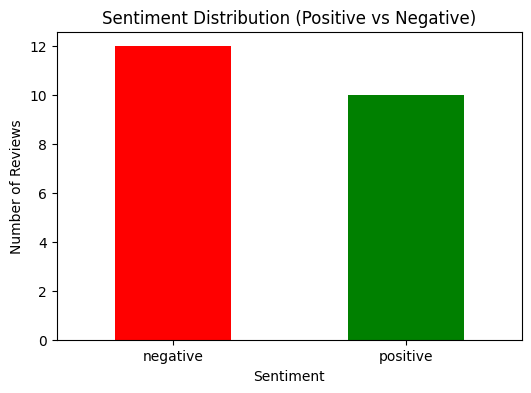


Top Positive Review:
Review: Unfortunately, this product didn’t meet our expectations. The frequent crashes and lack of updates made it difficult to rely on for critical tasks.
Sentiment Score: 0.9977827668190002

Top Negative Review:
Review: The analytics features provided insights we never knew we needed. This has helped our decision-making process immensely. Worth every penny.
Sentiment Score: 0.0014092877972871065

Average Sentiment Score: 0.4687371845251288

Number of Positive Reviews: 10
Number of Negative Reviews: 12


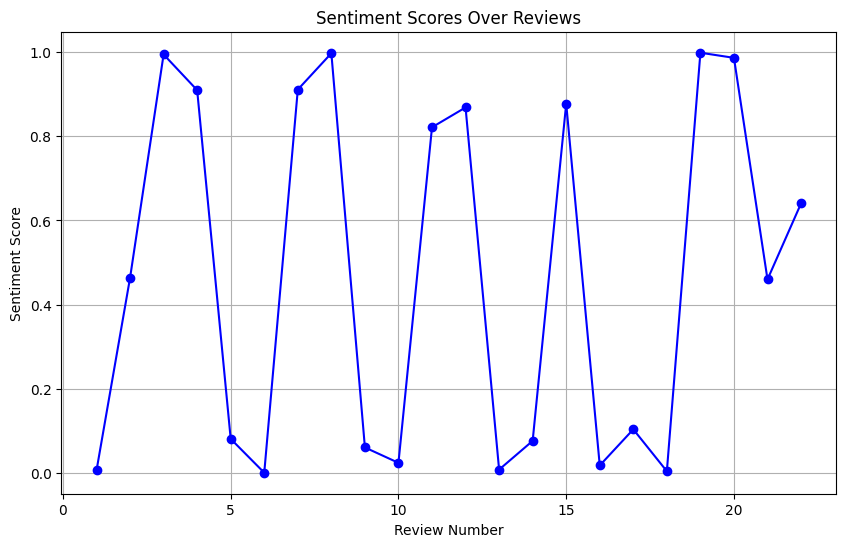


Top Keywords Mentioned in Reviews:
product       15
features       5
better         3
friendly       3
design         2
experience     2
promises       2
recommend      2
time           2
wouldn         2
dtype: int64


In [ ]:
# Create a DataFrame from the data
df = pd.DataFrame(data)

# 1. Overall Sentiment Distribution
sentiment_count = df['sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_count)

# Plot Sentiment Distribution
plt.figure(figsize=(6, 4))
sentiment_count.plot(kind='bar', color=['red', 'green'])
plt.title('Sentiment Distribution (Positive vs Negative)')
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.show()

# 2. Top Positive and Negative Reviews (highest and lowest sentiment scores)
top_positive_review = df.loc[df['sentiment_score'].idxmax()]
top_negative_review = df.loc[df['sentiment_score'].idxmin()]

print("\nTop Positive Review:")
print(f"Review: {top_positive_review['review']}")
print(f"Sentiment Score: {top_positive_review['sentiment_score']}")

print("\nTop Negative Review:")
print(f"Review: {top_negative_review['review']}")
print(f"Sentiment Score: {top_negative_review['sentiment_score']}")

# 3. Average Sentiment Score
average_sentiment_score = df['sentiment_score'].mean()
print("\nAverage Sentiment Score:", average_sentiment_score)

# 4. Count of Positive vs Negative Reviews
positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']
print("\nNumber of Positive Reviews:", len(positive_reviews))
print("Number of Negative Reviews:", len(negative_reviews))

# 5. Sentiment Over Time (if you have timestamps, or just by review index)
df['review_index'] = range(1, len(df) + 1)
plt.figure(figsize=(10, 6))
plt.plot(df['review_index'], df['sentiment_score'], marker='o', linestyle='-', color='b')
plt.title('Sentiment Scores Over Reviews')
plt.xlabel('Review Number')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

# Bonus: Keyword extraction from reviews (for business insights)
from sklearn.feature_extraction.text import CountVectorizer

# Convert reviews into a list of strings
reviews = df['review'].tolist()

# Using CountVectorizer to get word frequencies
vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(reviews)
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum up word counts across all reviews
word_frequencies = word_counts.sum(axis=0)
top_keywords = word_frequencies.sort_values(ascending=False).head(10)

print("\nTop Keywords Mentioned in Reviews:")
print(top_keywords)
